In [62]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
import matplotlib.colors as mcolors

In [63]:
m = folium.Map([33.447046773463654, -112.08091337731709], zoom_start=5)

In [64]:
recycling_df = pd.read_csv('./../../CSVs/Geographical/GEOGRAPHICAL lithium-reciclying-plants-with-weight.csv', delimiter=',')
ewaste_df = pd.read_csv('../../CSVs/Geographical/GEOGRAPHICAL Battery and e-waste collection centers USA.csv')
ewaste_df['Name'] = ewaste_df['name']
ewaste_df = ewaste_df.drop(columns=['name'])
ewaste_df = ewaste_df.drop(columns=['WKT'])

combined_df = pd.concat([recycling_df, ewaste_df], ignore_index=True, sort=False)
combined_df.fillna(0, inplace=True)

combined_df

,Name,Capacity,lon,lat,x,y,z,cluster,color
0,Li-Cycle New York Spoke,18000.0,-77.678291,43.198152,0.155567,-0.712198,0.684524,2,#fde725
1,Li-Cycle Arizona Spoke,18000.0,-114.153933,33.532385,-0.341090,-0.760594,0.552408,0,#440154
2,Ecobat Casa Grande,10000.0,-111.784761,32.889749,-0.311637,-0.779748,0.543024,0,#440154
3,Li-Cycle Alabama Spoke,10000.0,-87.639989,33.219809,0.034449,-0.835865,0.547852,1,#21918c
4,ACE Green Recycling,20000.0,-95.462811,29.738631,-0.082662,-0.864354,0.496044,1,#21918c
...,...,...,...,...,...,...,...,...,...
66,"PedalPoint evTerra Recycling,",0.0,-115.129013,35.987648,-0.343609,-0.732561,0.587611,1,#31688e
67,"BB Recycling,",0.0,-115.185434,36.078715,-0.343933,-0.731377,0.588896,1,#31688e
68,"Nevada Recycling,",0.0,-115.095023,36.243777,-0.342057,-0.730379,0.591222,1,#31688e
69,"Advanced Technology Recycling (ATR),",0.0,-115.193616,36.045155,-0.344184,-0.731639,0.588423,1,#31688e


In [65]:
X = combined_df[['x', 'y', 'z']]

In [66]:
k_values = range(2, 5)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

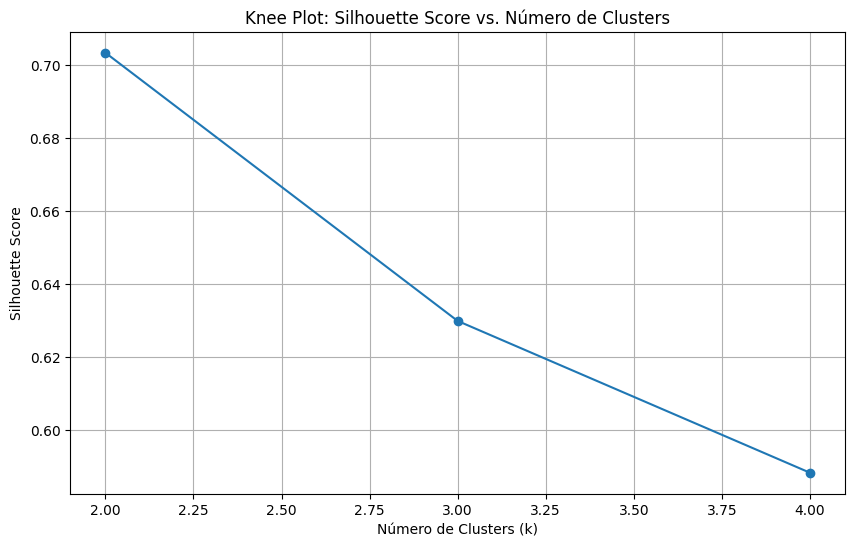

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Knee Plot: Silhouette Score vs. Número de Clusters')
plt.grid(True)
plt.show()

In [68]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5961


In [69]:
combined_df['cluster'] = cluster_labels
combined_df

,Name,Capacity,lon,lat,x,y,z,cluster,color
0,Li-Cycle New York Spoke,18000.0,-77.678291,43.198152,0.155567,-0.712198,0.684524,3,#fde725
1,Li-Cycle Arizona Spoke,18000.0,-114.153933,33.532385,-0.341090,-0.760594,0.552408,4,#440154
2,Ecobat Casa Grande,10000.0,-111.784761,32.889749,-0.311637,-0.779748,0.543024,4,#440154
3,Li-Cycle Alabama Spoke,10000.0,-87.639989,33.219809,0.034449,-0.835865,0.547852,3,#21918c
4,ACE Green Recycling,20000.0,-95.462811,29.738631,-0.082662,-0.864354,0.496044,1,#21918c
...,...,...,...,...,...,...,...,...,...
66,"PedalPoint evTerra Recycling,",0.0,-115.129013,35.987648,-0.343609,-0.732561,0.587611,2,#31688e
67,"BB Recycling,",0.0,-115.185434,36.078715,-0.343933,-0.731377,0.588896,2,#31688e
68,"Nevada Recycling,",0.0,-115.095023,36.243777,-0.342057,-0.730379,0.591222,2,#31688e
69,"Advanced Technology Recycling (ATR),",0.0,-115.193616,36.045155,-0.344184,-0.731639,0.588423,2,#31688e


In [70]:
centroids = kmeans.cluster_centers_

centroids_lat = np.degrees(np.arcsin(centroids[:, 2]))
centroids_lon = np.degrees(np.arctan2(centroids[:, 1], centroids[:, 0]))

centroids_df = pd.DataFrame({'cluster': range(k), 'lat': centroids_lat, 'lon': centroids_lon})

print(centroids_df)

   cluster        lat         lon
0        0  34.915365 -106.056166
1        1  31.234595  -96.339518
2        2  35.571990 -117.014443
3        3  33.776939  -82.818825
4        4  33.432041 -112.140639


In [71]:
unique_clusters = np.unique(cluster_labels)

colors = [plt.cm.viridis(i / (len(unique_clusters) - 1)) for i in range(len(unique_clusters))]

cluster_colors = {cluster: mcolors.to_hex(colors[i]) for i, cluster in enumerate(unique_clusters)}

combined_df['color'] = combined_df['cluster'].map(cluster_colors)
unique_clusters

array([0, 1, 2, 3, 4], dtype=int32)

In [72]:
def mark_on_map(row):
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.7,
        popup=f"Cluster: {row['cluster']} - Capacity {row['Capacity']}"
    ).add_to(m)

combined_df.apply(mark_on_map, axis=1)

m

In [73]:
# def mark_centroids(row):
#     folium.Marker(
#         location=[row['lat'], row['lon']],
#         tooltip=folium.Tooltip(f'Longitude: {row['lon']}\nLatitude: {row['lat']}'),
#         popup=f"Base Centroid {row['cluster']}",
#         icon=folium.Icon(color="green", icon="info-sign")
#     ).add_to(m)

# centroids_df.apply(mark_centroids, axis=1)
# m

In [74]:
def calculate_weight(row):

  row['w'] = 0 if not row['Capacity'] else row['Capacity']
  return row
  
combined_df = combined_df.apply(calculate_weight, axis=1)
combined_df


,Name,Capacity,lon,lat,x,y,z,cluster,color,w
0,Li-Cycle New York Spoke,18000.0,-77.678291,43.198152,0.155567,-0.712198,0.684524,3,#5ec962,18000.0
1,Li-Cycle Arizona Spoke,18000.0,-114.153933,33.532385,-0.341090,-0.760594,0.552408,4,#fde725,18000.0
2,Ecobat Casa Grande,10000.0,-111.784761,32.889749,-0.311637,-0.779748,0.543024,4,#fde725,10000.0
3,Li-Cycle Alabama Spoke,10000.0,-87.639989,33.219809,0.034449,-0.835865,0.547852,3,#5ec962,10000.0
4,ACE Green Recycling,20000.0,-95.462811,29.738631,-0.082662,-0.864354,0.496044,1,#3b528b,20000.0
...,...,...,...,...,...,...,...,...,...,...
66,"PedalPoint evTerra Recycling,",0.0,-115.129013,35.987648,-0.343609,-0.732561,0.587611,2,#21918c,0.0
67,"BB Recycling,",0.0,-115.185434,36.078715,-0.343933,-0.731377,0.588896,2,#21918c,0.0
68,"Nevada Recycling,",0.0,-115.095023,36.243777,-0.342057,-0.730379,0.591222,2,#21918c,0.0
69,"Advanced Technology Recycling (ATR),",0.0,-115.193616,36.045155,-0.344184,-0.731639,0.588423,2,#21918c,0.0


In [75]:
clusters = []
clusters_weight_avgs = []
for cluster_id in unique_clusters:
  cluster = combined_df[combined_df['cluster'] == cluster_id]
  clusters.append(cluster.index)
  
  
  cluster = cluster[cluster['w'] > 0]
  cluster_avg = np.average(cluster['w'])
  
  clusters_weight_avgs.append(cluster_avg)

print(clusters_weight_avgs)
print(clusters)


[np.float64(nan), np.float64(20000.0), np.float64(20000.0), np.float64(19333.333333333332), np.float64(14000.0)]
[Index([34, 35, 36, 37, 38, 39, 40, 41, 42], dtype='int64'), Index([4, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], dtype='int64'), Index([ 5,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
      dtype='int64'), Index([0, 3, 6, 15, 16], dtype='int64'), Index([1, 2, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], dtype='int64')]


c:\Users\octav\OneDrive - Universidad de Sonora\Archivos semestrales\Servicio Social\recicladora\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\octav\OneDrive - Universidad de Sonora\Archivos semestrales\Servicio Social\recicladora\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [76]:
#Fill the empty spaces with the current average

for rowIndex in range(len(combined_df)):
  row = combined_df.loc[rowIndex]
  if row['w'] == 0:
    combined_df.at[rowIndex,'w'] = clusters_weight_avgs[row['cluster']]
    

combined_df

,Name,Capacity,lon,lat,x,y,z,cluster,color,w
0,Li-Cycle New York Spoke,18000.0,-77.678291,43.198152,0.155567,-0.712198,0.684524,3,#5ec962,18000.0
1,Li-Cycle Arizona Spoke,18000.0,-114.153933,33.532385,-0.341090,-0.760594,0.552408,4,#fde725,18000.0
2,Ecobat Casa Grande,10000.0,-111.784761,32.889749,-0.311637,-0.779748,0.543024,4,#fde725,10000.0
3,Li-Cycle Alabama Spoke,10000.0,-87.639989,33.219809,0.034449,-0.835865,0.547852,3,#5ec962,10000.0
4,ACE Green Recycling,20000.0,-95.462811,29.738631,-0.082662,-0.864354,0.496044,1,#3b528b,20000.0
...,...,...,...,...,...,...,...,...,...,...
66,"PedalPoint evTerra Recycling,",0.0,-115.129013,35.987648,-0.343609,-0.732561,0.587611,2,#21918c,20000.0
67,"BB Recycling,",0.0,-115.185434,36.078715,-0.343933,-0.731377,0.588896,2,#21918c,20000.0
68,"Nevada Recycling,",0.0,-115.095023,36.243777,-0.342057,-0.730379,0.591222,2,#21918c,20000.0
69,"Advanced Technology Recycling (ATR),",0.0,-115.193616,36.045155,-0.344184,-0.731639,0.588423,2,#21918c,20000.0


In [77]:
#Calculate weights
clusters_weights = []

for cluster in clusters:
  members = combined_df.loc[cluster]
  cluster_weight = np.sum(members['w'])
  clusters_weights.append(cluster_weight)

clusters_weights


[np.float64(0.0),
 np.float64(220000.0),
 np.float64(680000.0),
 np.float64(96666.66666666666),
 np.float64(168000.0)]

In [78]:
for index, cluster in enumerate(clusters):
  cluster_weight = clusters_weights[index]  
  for point_index in cluster:
    point = combined_df.loc[point_index]
    combined_df.at[point_index, 'w'] = point['w'] / cluster_weight if cluster_weight else 1 / len(cluster)


combined_df


,Name,Capacity,lon,lat,x,y,z,cluster,color,w
0,Li-Cycle New York Spoke,18000.0,-77.678291,43.198152,0.155567,-0.712198,0.684524,3,#5ec962,0.186207
1,Li-Cycle Arizona Spoke,18000.0,-114.153933,33.532385,-0.341090,-0.760594,0.552408,4,#fde725,0.107143
2,Ecobat Casa Grande,10000.0,-111.784761,32.889749,-0.311637,-0.779748,0.543024,4,#fde725,0.059524
3,Li-Cycle Alabama Spoke,10000.0,-87.639989,33.219809,0.034449,-0.835865,0.547852,3,#5ec962,0.103448
4,ACE Green Recycling,20000.0,-95.462811,29.738631,-0.082662,-0.864354,0.496044,1,#3b528b,0.090909
...,...,...,...,...,...,...,...,...,...,...
66,"PedalPoint evTerra Recycling,",0.0,-115.129013,35.987648,-0.343609,-0.732561,0.587611,2,#21918c,0.029412
67,"BB Recycling,",0.0,-115.185434,36.078715,-0.343933,-0.731377,0.588896,2,#21918c,0.029412
68,"Nevada Recycling,",0.0,-115.095023,36.243777,-0.342057,-0.730379,0.591222,2,#21918c,0.029412
69,"Advanced Technology Recycling (ATR),",0.0,-115.193616,36.045155,-0.344184,-0.731639,0.588423,2,#21918c,0.029412


In [79]:
for cluster in clusters:
  members = combined_df.loc[cluster]
  print(np.sum(members['w']))

1.0
1.0
1.0
1.0
1.0


In [80]:
clusters_coordinates: list[tuple[float, float, float]] = []

for index, cluster in enumerate(clusters):
  xw = 0
  yw = 0
  zw = 0
  for point_index in cluster:
    point = combined_df.loc[point_index]
    xw += point['w'] * point['x']
    yw += point['w'] * point['y']
    zw += point['w'] * point['z']
  
  clusters_coordinates.append([xw, yw, zw])

# Convert clusters_coordinates to a NumPy array for slicing
clusters_coordinates = np.array(clusters_coordinates)

clusters_coordinates_lat = np.degrees(np.arcsin(clusters_coordinates[:, 2]))
clusters_coordinates_lon = np.degrees(np.arctan2(clusters_coordinates[:, 1], clusters_coordinates[:, 0]))

clusters_coordinates_df = pd.DataFrame({'cluster': range(k), 'lat': clusters_coordinates_lat, 'lon': clusters_coordinates_lon})
clusters_coordinates_df

,cluster,lat,lon
0,0,34.915365,-106.056166
1,1,31.234595,-96.339518
2,2,35.571990,-117.014443
3,3,33.690526,-82.524135
4,4,33.447382,-112.197050


In [81]:
def mark_centroids(row):
    folium.Marker(
        location=[row['lat'], row['lon']],
        tooltip=folium.Tooltip(f'Longitude: {row['lon']}\nLatitude: {row['lat']}'),
        popup=f"Weighted Centroid\n{row['cluster']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)


clusters_coordinates_df.apply(mark_centroids, axis=1)
m

In [82]:
html = m._repr_html_()

with open('./map.html', mode='w') as html_file:
  html_file.write(html)